In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

## House Sales in King County, USA
### Data:
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data
### Column description:
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885

In [2]:
kc = pd.read_csv('kc_house_data.csv')

In [3]:
# square foot to square meter conversion
sqft_to_sqmeters = 0.09290303997 # (square meters)

In [4]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
kc.shape

(21613, 21)

In [6]:
kc.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
kcm = kc.copy()

In [8]:
kcm = kcm.drop(['id', 'zipcode', 'lat', 'long'], axis = 1)

In [9]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [10]:
kcm[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] = (sqft_to_sqmeters * kcm[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]).astype(int)

In [11]:
kcm.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,109,524,1.0,0,0,3,7,109,0,1955,0,124,524
1,20141209T000000,538000.0,3,2.25,238,672,2.0,0,0,3,7,201,37,1951,1991,157,709
2,20150225T000000,180000.0,2,1.00,71,929,1.0,0,0,3,6,71,0,1933,0,252,748
3,20141209T000000,604000.0,4,3.00,182,464,1.0,0,0,5,7,97,84,1965,0,126,464
4,20150218T000000,510000.0,3,2.00,156,750,1.0,0,0,3,8,156,0,1987,0,167,697


In [12]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [13]:
kcm.columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15']

In [14]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15'],
      dtype='object')

In [15]:
kcm.date.map(lambda x: print('', end = '') if (x[-7:]=='T000000') else print('###'))

0        None
1        None
2        None
3        None
4        None
         ... 
21608    None
21609    None
21610    None
21611    None
21612    None
Name: date, Length: 21613, dtype: object

In [16]:
kcm.date = kcm.date.map(lambda x: x[:-7])

In [17]:
kcm.isnull().sum()

date            0
price           0
bedrooms        0
bathrooms       0
sqm_living      0
sqm_lot         0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqm_above       0
sqm_basement    0
yr_built        0
yr_renovated    0
sqm_living15    0
sqm_lot15       0
dtype: int64

### Column defintions
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and - - - design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
[column.sum()]

In [126]:
[kcm.agg(kcm[col].sum()) for col in kcm.columns]

AssertionError: 

In [129]:
[kcm[column][kcm[column] != 0].sum() for column in kcm.columns]

[142093,
 43535562,
 11672925008.0,
 72854,
 45706.25,
 4165399,
 30322547,
 32296.5,
 163,
 5064,
 73688,
 165488,
 3579957,
 581164,
 42599334,
 1824186,
 3977969,
 25626969]

In [18]:
kcm.agg([lambda x: (x==0).sum()]).T

,<lambda>
date,0
price,0
bedrooms,13
bathrooms,10
sqm_living,0
sqm_lot,0
floors,0
waterfront,21450
view,19489
condition,0


In [19]:
kcm.shape

(21613, 17)

In [20]:
kcm.insert(1, 'year', kcm.date.map(lambda x: x[:-4]).astype('int'))

In [21]:
kcm.insert(1, 'month', kcm.date.map(lambda x: x[-4:-2]).astype('int'))

In [22]:
kcm = kcm.drop(['date'], axis=1)

In [39]:
kcm.head(5)

,month,year,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,sqm_living15,sqm_lot15
0,10,2014,221900.0,3,1.00,109,524,1.0,0,0,3,7,109,0,1955,0,124,524
1,12,2014,538000.0,3,2.25,238,672,2.0,0,0,3,7,201,37,1951,1991,157,709
2,2,2015,180000.0,2,1.00,71,929,1.0,0,0,3,6,71,0,1933,0,252,748
3,12,2014,604000.0,4,3.00,182,464,1.0,0,0,5,7,97,84,1965,0,126,464
4,2,2015,510000.0,3,2.00,156,750,1.0,0,0,3,8,156,0,1987,0,167,697


In [24]:
kcm.describe()

,month,year,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,sqm_living15,sqm_lot15
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,6.574423,2014.322954,5.400881e+05,3.370842,2.114757,192.726553,1402.977236,1.494309,0.007542,0.234303,3.409430,7.656873,165.639060,26.889557,1971.005136,84.402258,184.054458,1185.720122
std,3.115308,0.467616,3.671272e+05,0.930062,0.770163,85.328209,3848.096738,0.539989,0.086517,0.766318,0.650743,1.175459,76.936941,40.917763,29.373411,401.679240,63.678535,2536.646451
min,1.000000,2014.000000,7.500000e+04,0.000000,0.000000,26.000000,48.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,1900.000000,0.000000,37.000000,60.000000
25%,4.000000,2014.000000,3.219500e+05,3.000000,1.750000,132.000000,468.000000,1.000000,0.000000,0.000000,3.000000,7.000000,110.000000,0.000000,1951.000000,0.000000,138.000000,473.000000
50%,6.000000,2014.000000,4.500000e+05,3.000000,2.250000,177.000000,707.000000,1.500000,0.000000,0.000000,3.000000,7.000000,144.000000,0.000000,1975.000000,0.000000,170.000000,707.000000
75%,9.000000,2015.000000,6.450000e+05,4.000000,2.500000,236.000000,992.000000,2.000000,0.000000,0.000000,4.000000,8.000000,205.000000,52.000000,1997.000000,0.000000,219.000000,936.000000
max,12.000000,2015.000000,7.700000e+06,33.000000,8.000000,1257.000000,153416.000000,3.500000,1.000000,4.000000,5.000000,13.000000,874.000000,447.000000,2015.000000,2015.000000,576.000000,80937.000000


In [58]:
kcm['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [25]:
kcm.columns

Index(['month', 'year', 'price', 'bedrooms', 'bathrooms', 'sqm_living',
       'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15'],
      dtype='object')

<Axes: xlabel='yr_built', ylabel='Count'>

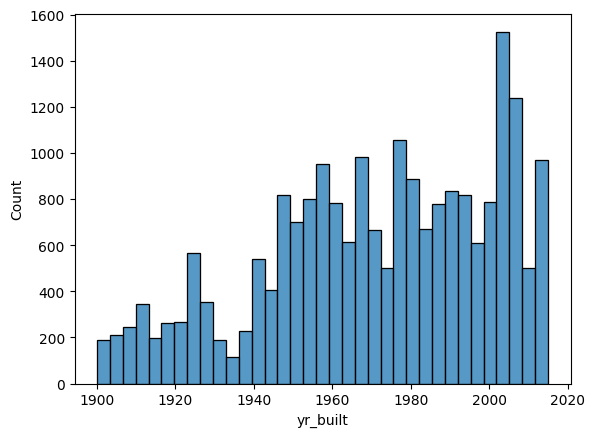

In [26]:
sns.histplot(data = kcm.yr_built)

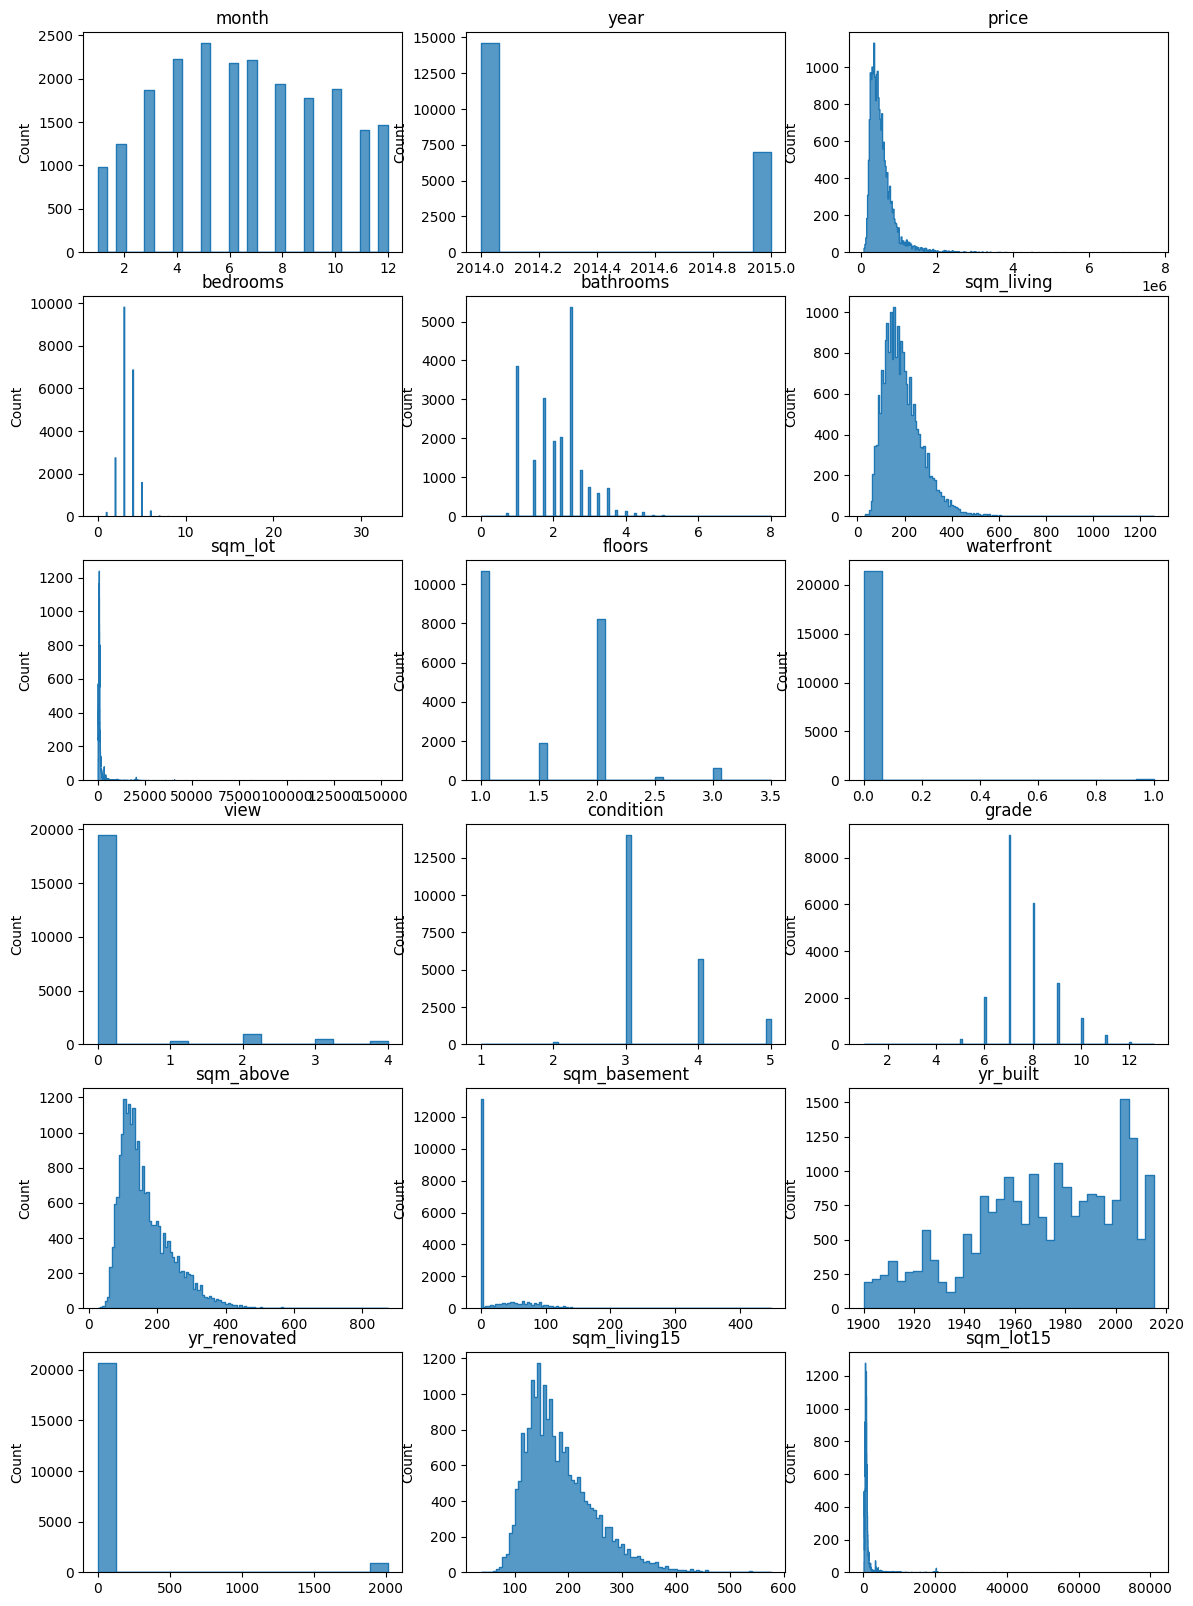

In [27]:
plotcols = 3
fig, axs = plt.subplots(6, plotcols, figsize=(14, 20))
j=0
for col in kcm.columns:
    sns.histplot(data=kcm[col], ax = axs[j//plotcols,j%plotcols], element = 'step').set(xlabel = '')
    axs[j//plotcols,j%plotcols].set_title(col)
    j+=1

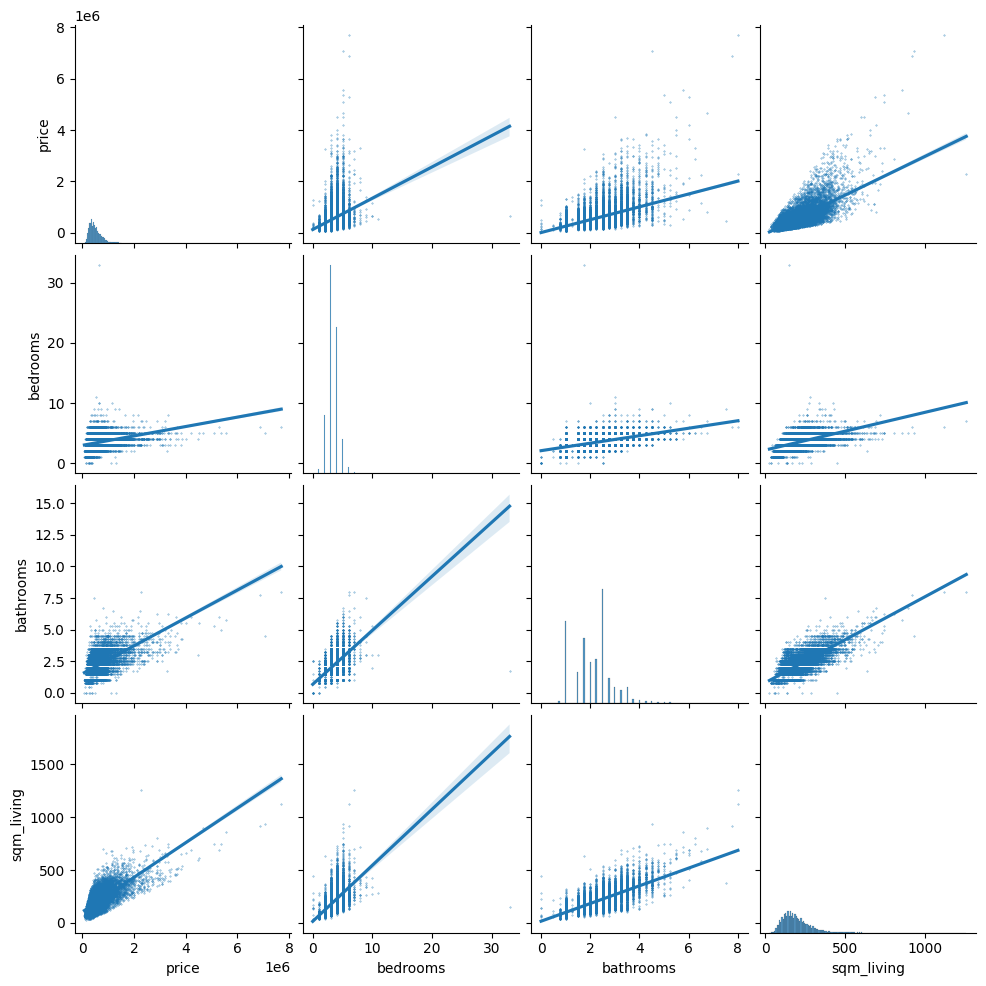

In [38]:
sns.pairplot(kcm[['price', 'bedrooms', 'bathrooms', 'sqm_living']], kind = 'reg', plot_kws=dict(scatter_kws=dict(s=0.1)))

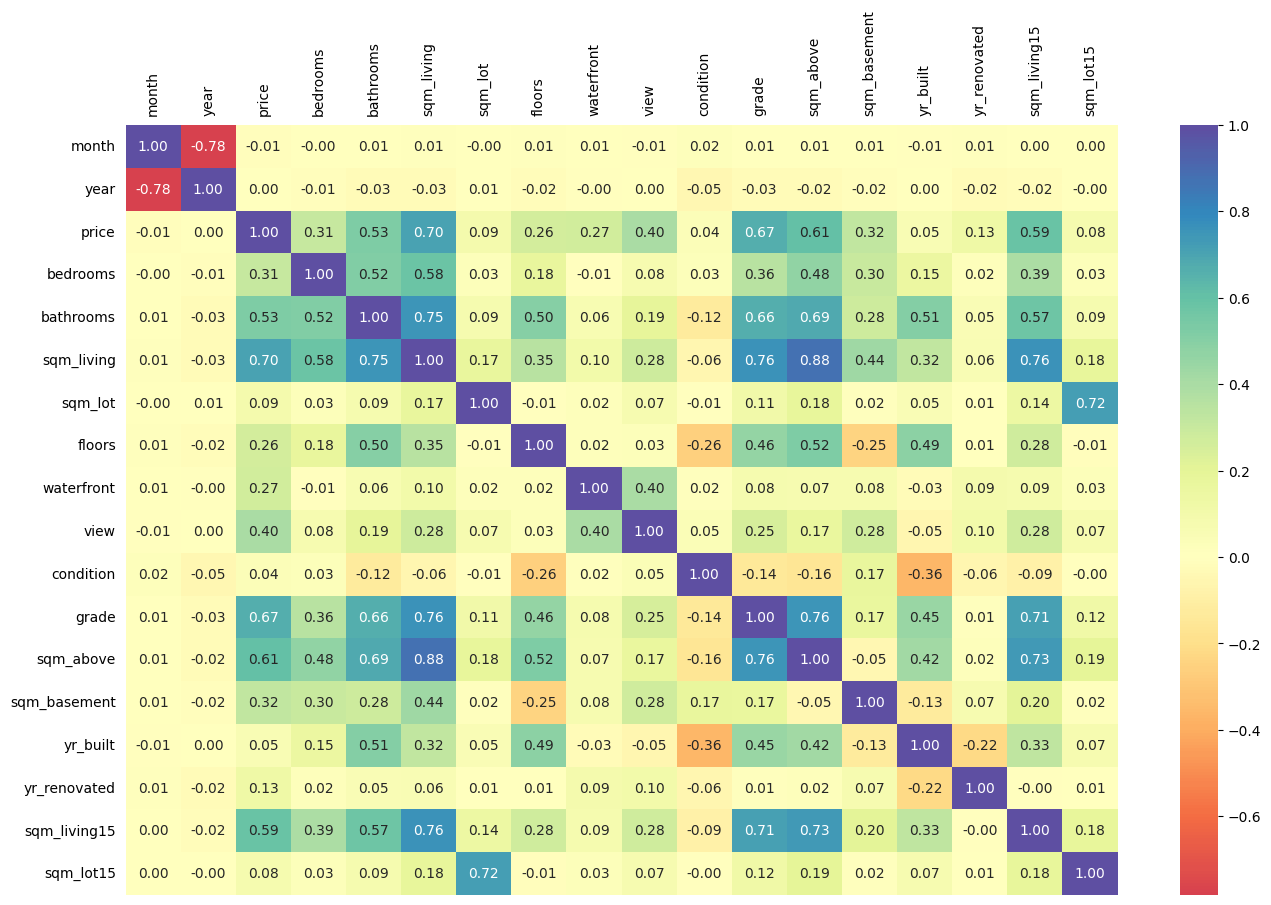

In [117]:
plt.subplots(figsize=(16, 10))
sns.heatmap(kcm._get_numeric_data().corr(), annot=True, center = 0, fmt='.2f', cmap = 'Spectral')
plt.tick_params(labeltop = True, labelbottom=False, bottom = False, left = False)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

<Axes: xlabel='sqm_living', ylabel='price'>

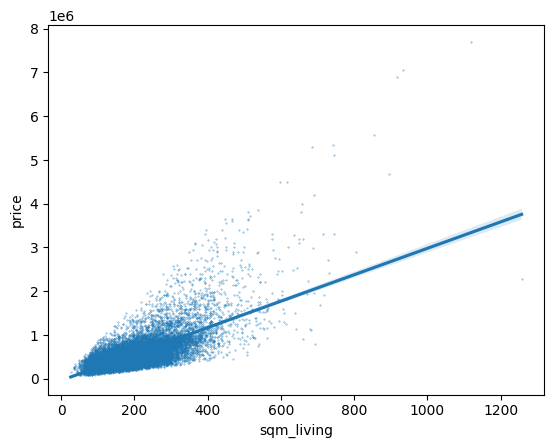

In [51]:
sns.regplot(data = kcm, x = 'sqm_living', y = 'price', scatter_kws=dict(s=0.1))

<Axes: xlabel='sqm_living', ylabel='price'>

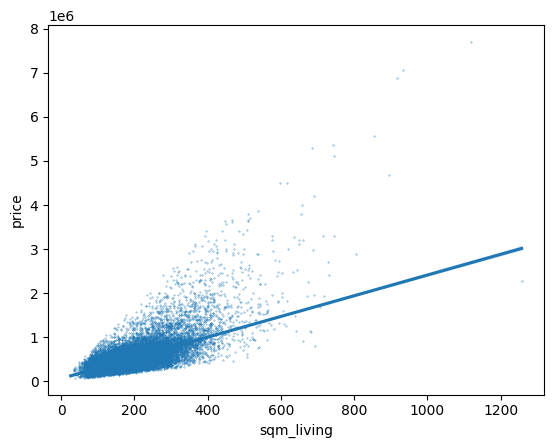

In [102]:
sns.regplot(data = kcm, x = 'sqm_living', y = 'price', scatter_kws=dict(s=0.1), robust=True)

In [59]:
kcm.columns

Index(['month', 'year', 'price', 'bedrooms', 'bathrooms', 'sqm_living',
       'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15'],
      dtype='object')

In [79]:
mod = smf.ols('price ~ sqm_living', data = kcm)

In [80]:
mod.fit().resid

0        -65294.122227
1       -138835.486540
2          7583.954082
3         96311.152232
4         80843.520233
             ...      
21608    -26869.820075
21609   -204344.069923
21610    160214.013158
21611     -4992.674229
21612     83113.013158
Length: 21613, dtype: float64

<Axes: >

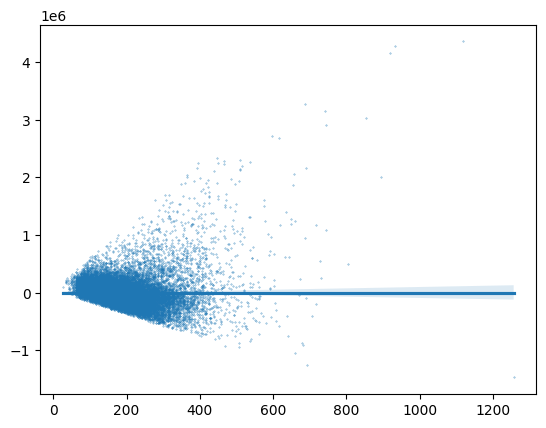

In [86]:
sns.regplot(x = mod.exog[:,1], y = mod.fit().resid, scatter_kws=dict(s=0.1))

<Axes: >

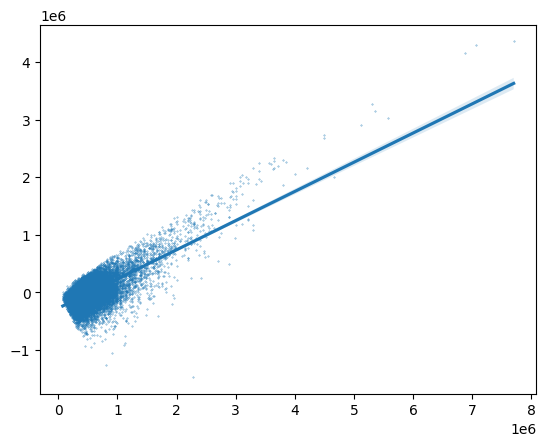

In [87]:
sns.regplot(x = mod.endog, y = mod.fit().resid, scatter_kws=dict(s=0.1))

<Axes: >

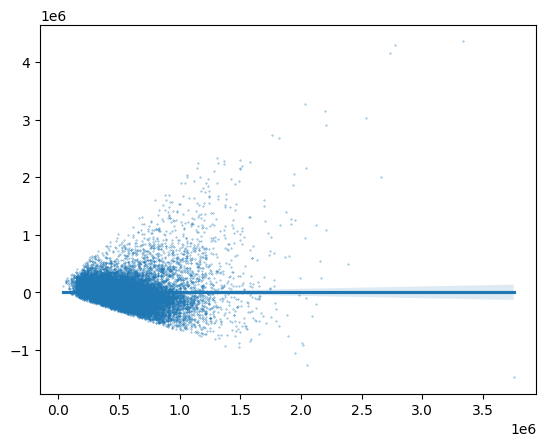

In [92]:
sns.regplot(x = mod.fit().fittedvalues, y = mod.fit().resid, scatter_kws=dict(s=0.1))

In [93]:
mod.fit().get_robustcov_results(cov_type='HC1', use_t=None).pvalues

array([9.46484997e-05, 0.00000000e+00])

In [94]:
mod.fit().pvalues

Intercept     1.190833e-21
sqm_living    0.000000e+00
dtype: float64

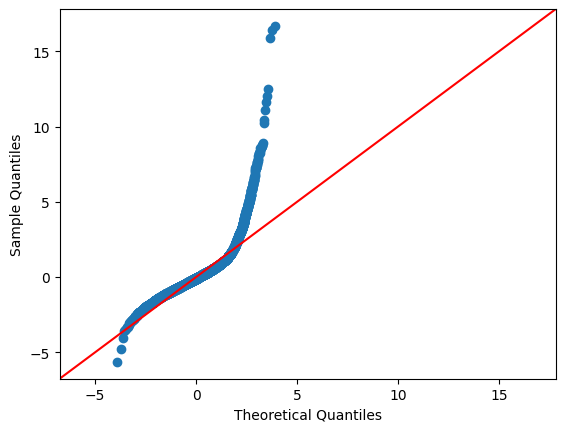

In [91]:
sm.qqplot(mod.fit().resid, line='45', fit = True)
plt.show()

<Axes: ylabel='Count'>

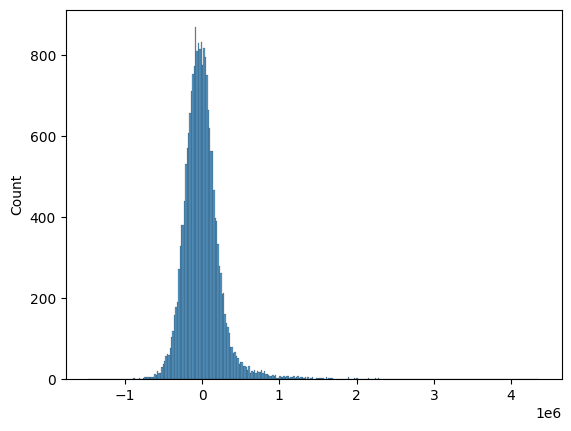

In [96]:
sns.histplot(mod.fit().resid)

In [98]:
st.shapiro(mod.fit().resid)

C:\Users\THW\AppData\Local\Temp\ipykernel_12304\4190429717.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21613.
  st.shapiro(mod.fit().resid)


ShapiroResult(statistic=0.8369582936208919, pvalue=1.0484015947407542e-89)

In [116]:
mod.fit().get_robustcov_results(cov_type='HC1', use_t=None).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     2470.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:29:10   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.204e+04   1.08e+04     -3.905      0.000   -6.31e+04   -2.09e+04
sqm_living  3020.4757     60.780     49.695      0.000    2901.342    3139.610
==============================================================================
Omnibus:                    14832.953   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546572.389
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.980   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [118]:
mod.fit().get_robustcov_results(cov_type='HC2', use_t=None).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     2463.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:50:10   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.204e+04   1.08e+04     -3.900      0.000   -6.32e+04   -2.09e+04
sqm_living  3020.4757     60.855     49.634      0.000    2901.195    3139.757
==============================================================================
Omnibus:                    14832.953   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546572.389
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.980   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

<Axes: xlabel='sqm_living', ylabel='price'>

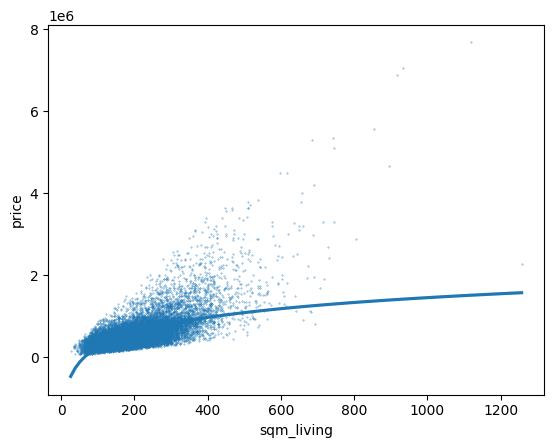

In [101]:
sns.regplot(data = kcm, x = 'sqm_living', y = 'price', scatter_kws=dict(s=0.1), logx=True)

<Axes: xlabel='sqm_living', ylabel='price'>

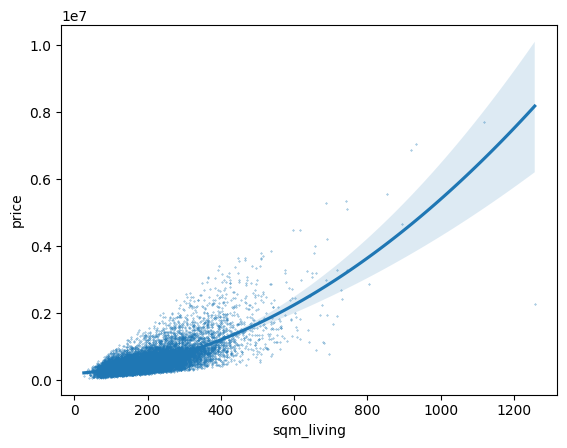

In [115]:
sns.regplot(data = kcm, x = 'sqm_living', y = 'price', scatter_kws=dict(s=0.1), order = 2)

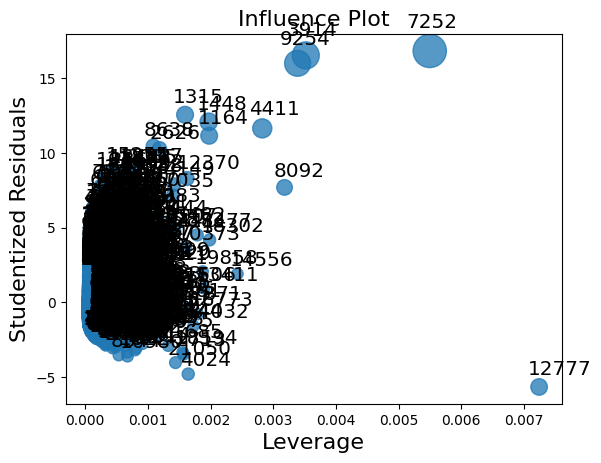

In [119]:
sm.graphics.influence_plot(mod.fit(), size = 24)
plt.show()

In [108]:
mod.fit().get_influence().cooks_distance   #cook's distance and pvalues

(array([2.83249522e-06, 8.36054091e-06, 5.90953533e-08, ...,
        2.03205008e-05, 1.07548032e-08, 5.46854087e-06]),
 array([0.99999717, 0.99999164, 0.99999994, ..., 0.99997968, 0.99999999,
        0.99999453]))

<Axes: >

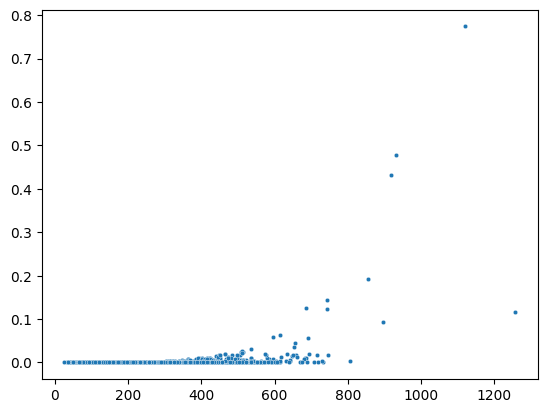

In [114]:
sns.scatterplot(x = mod.exog[:,1], y = mod.fit().get_influence().cooks_distance[0], s=10)

In [69]:
'''groups = kcm.groupby(['condition', 'view'])
print(groups.ngroups, ' groups \n')
def print_stuff(group_name, model):
    print(#model.fit().rsquared.round(2), '     ',
    #(model.fit().scale**0.5).round(2), '     ',
    model.fit().params.iloc[1].round(2), '     ',
    model.fit().pvalues.values[1].round(3), '      ',
    model.formula, '     ', group_name[0], '   ', model.nobs)
print('slope      slope_p        formula                   group     nobs')
for i in groups:
    mod = smf.ols('price ~ bedrooms', data = i[1])
    print_stuff(i, mod)
    mod = smf.ols('price ~ bathrooms', data = i[1])
    print_stuff(i, mod)
    mod = smf.ols('price ~ sqm_living', data = i[1])
    print_stuff(i, mod)
    mod = smf.ols('price ~ sqm_lot', data = i[1])
    print_stuff(i, mod)
    mod = smf.ols('price ~ yr_built', data = i[1])
    print_stuff(i, mod)'''

"groups = kcm.groupby(['condition', 'view'])\nprint(groups.ngroups, ' groups \n')\ndef print_stuff(group_name, model):\n    print(#model.fit().rsquared.round(2), '     ',\n    #(model.fit().scale**0.5).round(2), '     ',\n    model.fit().params.iloc[1].round(2), '     ',\n    model.fit().pvalues.values[1].round(3), '      ',\n    model.formula, '     ', group_name[0], '   ', model.nobs)\nprint('slope      slope_p        formula                   group     nobs')\nfor i in groups:\n    mod = smf.ols('price ~ bedrooms', data = i[1])\n    print_stuff(i, mod)\n    mod = smf.ols('price ~ bathrooms', data = i[1])\n    print_stuff(i, mod)\n    mod = smf.ols('price ~ sqm_living', data = i[1])\n    print_stuff(i, mod)\n    mod = smf.ols('price ~ sqm_lot', data = i[1])\n    print_stuff(i, mod)\n    mod = smf.ols('price ~ yr_built', data = i[1])\n    print_stuff(i, mod)"